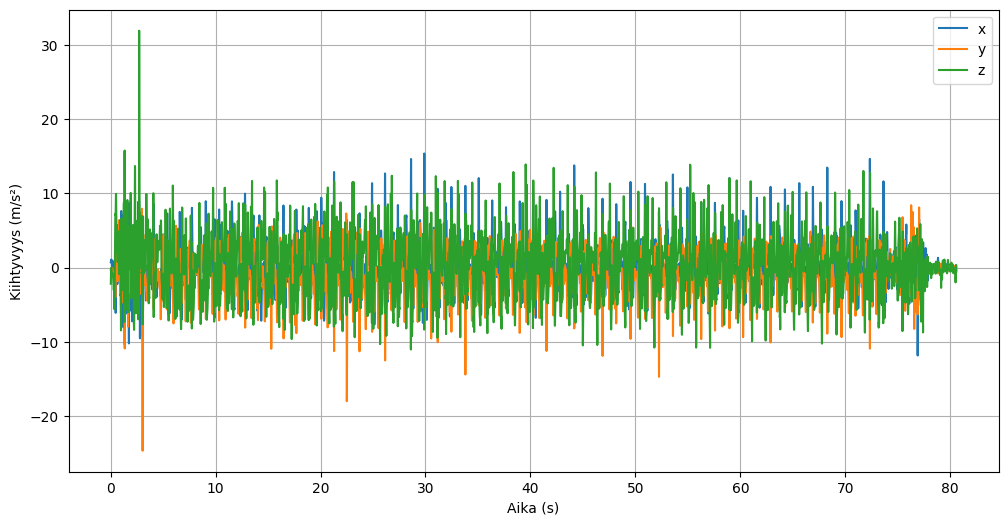

Mittauksen kesto: 80.56 sekuntia
Askeltaajuus: 1.24 Hz


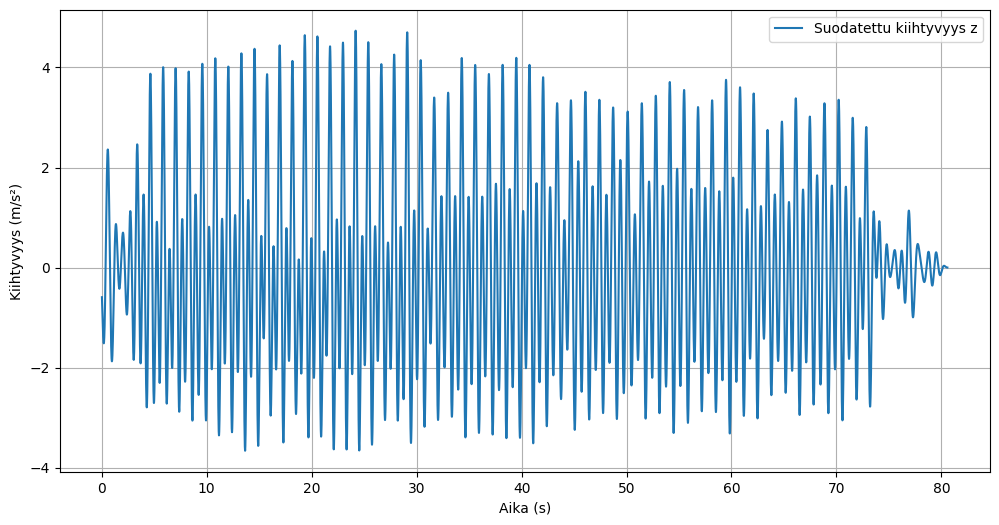

Laskettu askelten määrä (huiput): 123
Arvioitu askelten määrä: 123
Todellinen askelten määrä: 100


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt, find_peaks

df = pd.read_csv("Raw Data.csv")
plt.figure(figsize=(12, 6))
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], label='x')
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], label='y')
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='z')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.legend()
plt.grid()
plt.show()

time = df['Time (s)']
acceleration = df['Linear Acceleration z (m/s^2)']
total_time = time.iloc[-1] - time.iloc[0]
print(f"Mittauksen kesto: {total_time:.2f} sekuntia")
total_steps = 100
step_frequency = total_steps / total_time
print(f"Askeltaajuus: {step_frequency:.2f} Hz")
fs = 1 / np.mean(np.diff(time))
lowcut = step_frequency - 0.5
highcut = step_frequency + 0.5
lowcut = max(lowcut, 0.1)
highcut = min(highcut, fs / 2 - 0.1)
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq
order = 4
b, a = butter(order, [low, high], btype='band')
filtered_acceleration = filtfilt(b, a, acceleration)
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_acceleration, label='Suodatettu kiihtyvyys z')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.legend()
plt.grid()
plt.show()

peaks, _ = find_peaks(filtered_acceleration, height=0)
step_count = len(peaks)
print(f"Laskettu askelten määrä (huiput): {step_count}")

inverted_signal = -filtered_acceleration
min_peaks, _ = find_peaks(inverted_signal, height=0)

total_peaks = len(peaks) + len(min_peaks)
estimated_steps = total_peaks // 2
print(f"Arvioitu askelten määrä: {estimated_steps}")
print(f"Todellinen askelten määrä: {total_steps}")

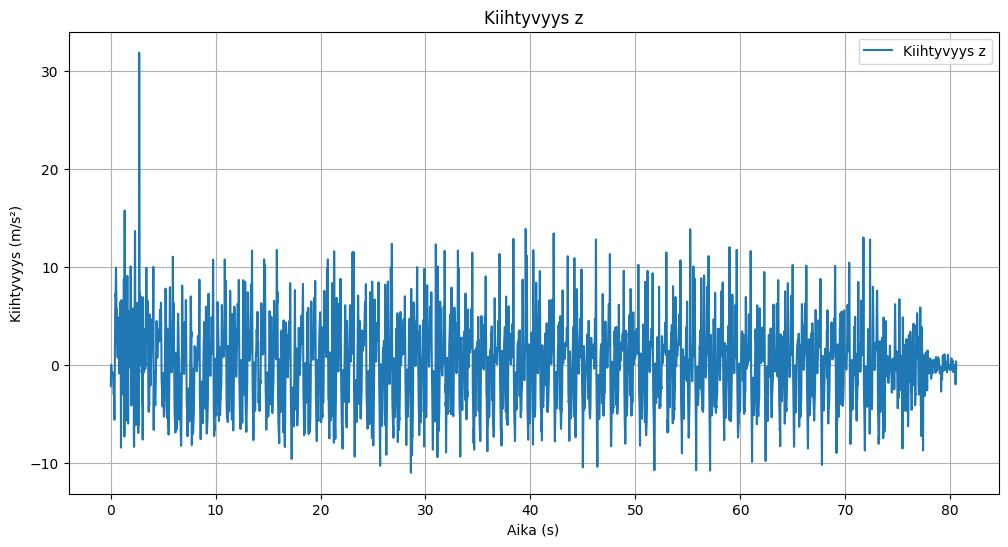

In [54]:
time = df['Time (s)']
acceleration = df['Linear Acceleration z (m/s^2)']

plt.figure(figsize=(12, 6))
plt.plot(time, acceleration, label='Kiihtyvyys z')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title('Kiihtyvyys z')
plt.legend()
plt.grid()
plt.show()

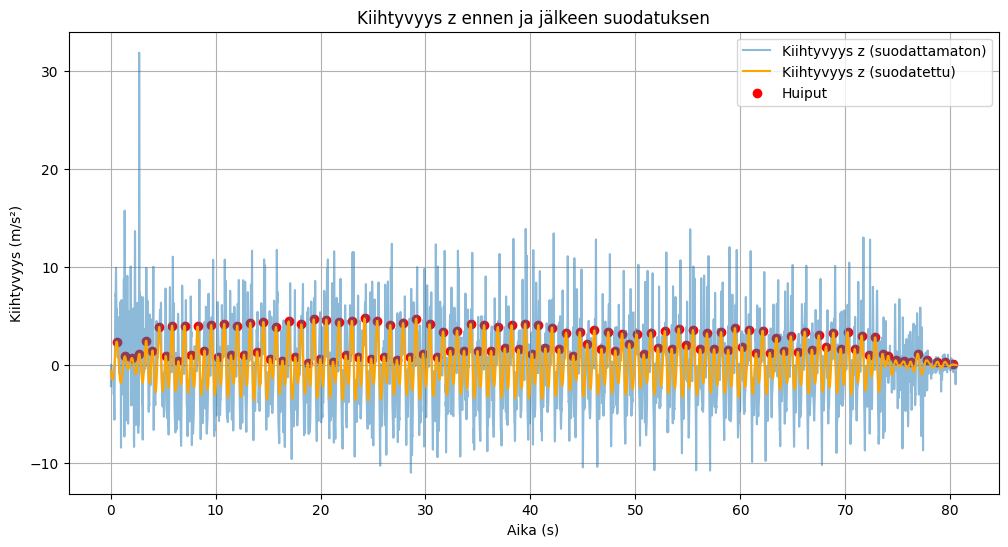

Arvioitu askelten määrä: 123


In [55]:
time = df['Time (s)']
acceleration = df['Linear Acceleration z (m/s^2)']

fs = 1 / np.mean(np.diff(time))

total_steps = 100
total_time = time.iloc[-1] - time.iloc[0]

step_frequency = total_steps / total_time

lowcut = step_frequency - 0.5
highcut = step_frequency + 0.5

lowcut = max(lowcut, 0.1)
highcut = min(highcut, fs / 2 - 0.1)

order = 4
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq
b, a = butter(order, [low, high], btype='band')
filtered_acceleration = filtfilt(b, a, acceleration)

peaks, _ = find_peaks(filtered_acceleration, height=0)
step_count = len(peaks)

plt.figure(figsize=(12, 6))
plt.plot(time, acceleration, label='Kiihtyvyys z (suodattamaton)', alpha=0.5)
plt.plot(time, filtered_acceleration, label='Kiihtyvyys z (suodatettu)', color='orange')
plt.scatter(time.iloc[peaks], filtered_acceleration[peaks], color='red', label='Huiput')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title('Kiihtyvyys z ennen ja jälkeen suodatuksen')
plt.legend()
plt.grid()
plt.show()

print(f"Arvioitu askelten määrä: {step_count}")

PermissionError: [Errno 13] Permission denied: 'askelmittari_kuvaaja.pdf'

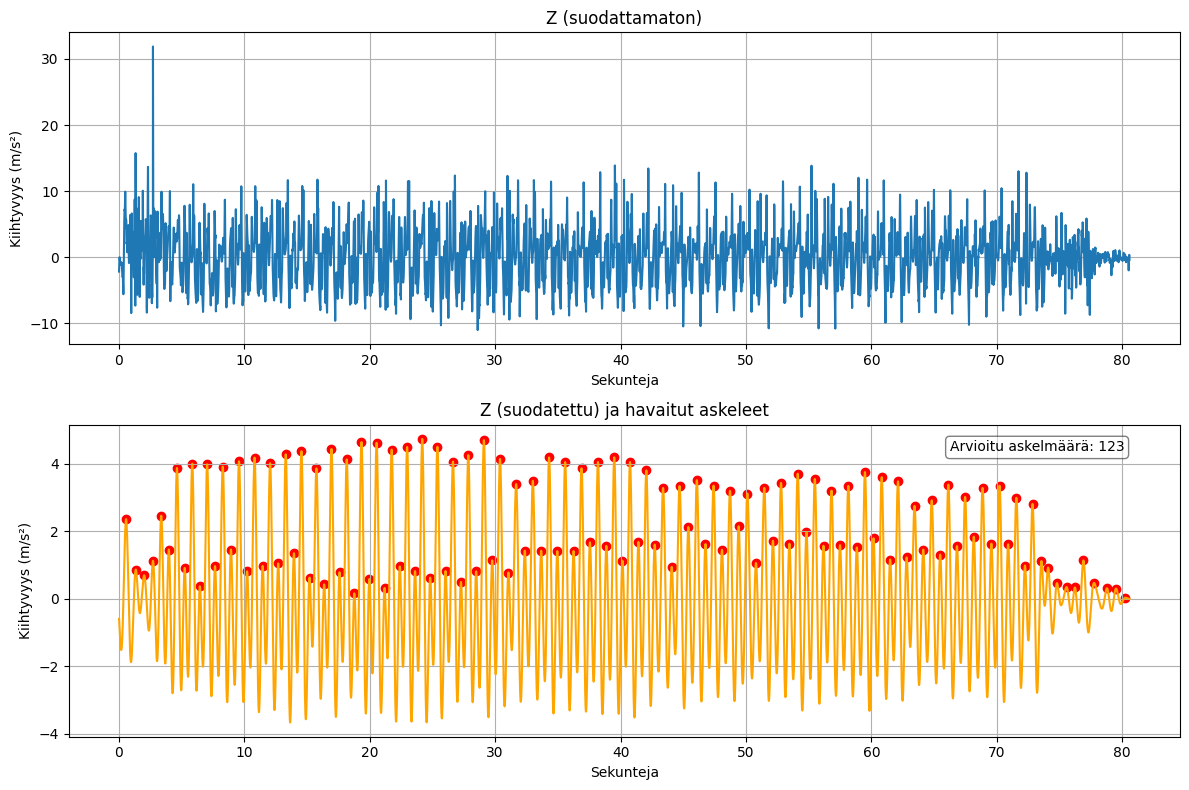

In [56]:
time = df['Time (s)']
acceleration = df['Linear Acceleration z (m/s^2)']

fs = 1 / np.mean(np.diff(time))
total_steps = 100
total_time = time.iloc[-1] - time.iloc[0]

step_frequency = total_steps / total_time
lowcut = step_frequency - 0.5
highcut = step_frequency + 0.5
lowcut = max(lowcut, 0.1)
highcut = min(highcut, fs / 2 - 0.1)

order = 4
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq
b, a = butter(order, [low, high], btype='band')
filtered_acceleration = filtfilt(b, a, acceleration)

peaks, _ = find_peaks(filtered_acceleration, height=0)
step_count = len(peaks)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(time, acceleration)
axs[0].set_title('Z (suodattamaton)')
axs[0].set_xlabel('Sekunteja')
axs[0].set_ylabel('Kiihtyvyys (m/s²)')
axs[0].grid()

axs[1].plot(time, filtered_acceleration, color='orange')
axs[1].scatter(time.iloc[peaks], filtered_acceleration[peaks], color='red')
axs[1].set_title('Z (suodatettu) ja havaitut askeleet')
axs[1].set_xlabel('Sekunteja')
axs[1].set_ylabel('Kiihtyvyys (m/s²)')
axs[1].grid()

estimated_steps_text = f"Arvioitu askelmäärä: {step_count}"
axs[1].text(0.95, 0.95, estimated_steps_text, transform=axs[1].transAxes,
            horizontalalignment='right', verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()

plt.savefig('askelmittari_kuvaaja.pdf')
plt.show()
